PostgreSQL connection is closed


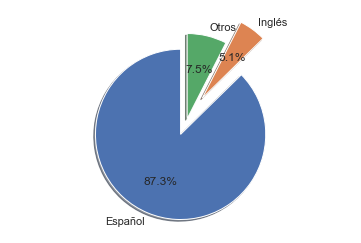

KeyboardInterrupt: 

In [28]:
import psycopg2
import sys, nltk, re, string, heapq
from psycopg2 import Error

import pandas as pd
import pandas.io.sql as sqlio

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from mlxtend.plotting import plot_confusion_matrix

def crearConexion():
    
    connection = psycopg2.connect(user = "m.soto.montesinos",
                                      password = "1234",
                                      host = "127.0.0.1",
                                      port = "5432",
                                      database = "twitterBBVA")

    return connection

def obtenerTweets():

    try:
        
        connection = crearConexion()
        query = "select lang, created_at from copy_original_tweets"
        
        tweets = sqlio.read_sql_query(query, connection)
        
    except (Exception, psycopg2.DatabaseError) as error :
    
        print ("Error obteniendo los datos", error)
    
    finally:
        
        if (connection):
            
            connection.close()
            print("PostgreSQL connection is closed")

    return tweets


def main():
    
    tweets = obtenerTweets()
    
    tweets["created_at"] = pd.to_datetime(tweets["created_at"])
    tweets = tweets.sort_values(by="created_at")
    
    tweets_español = 0
    tweets_ingles  = 0
    tweets_otros   = 0
    lista_fechas   = []
    
    #Distribution matrix
    for index, row in tweets.iterrows():
    
        lng_txt = (row['lang'])
        fecha = str((row['created_at']))
        
        fecha = fecha.split()[0]
        lista_fechas.append(str(fecha))
        
        if lng_txt == "es":
            
            tweets_español = tweets_español + 1
            
        elif lng_txt == "en":
            
            tweets_ingles = tweets_ingles + 1
            
        else:
            
            tweets_otros = tweets_otros + 1
    
    
    #Pie char
    labels = 'Español', 'Inglés', 'Otros'
    sizes = [tweets_español, tweets_ingles, tweets_otros]
    explode = (0.2, 0.3, 0)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')

    plt.show()
    
    #Historigrama
    #fig, ax1 = plt.subplots(figsize=(15, 10))
    #ax1.hist(lista_fechas, 
    #         bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
    #         color="dodgerblue",
    #         rwidth = 0.95, 
    #         align = 'left',
    #ax1.set_xlabel('Fecha')
    #ax1.set_ylabel('Número Tweets')
    #plt.yticks(rotation='vertical')
    
    #Historigrama
    fig, ax1 = plt.subplots(figsize=(10, 15))
    ax1.hist(lista_fechas, 
             bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
             color="dodgerblue",
             rwidth = 0.95, 
             align = 'left',
             orientation = 'horizontal')
    ax1.set_xlabel('Número de Tweets')
    ax1.set_ylabel('Fecha')
    #plt.yticks(rotation='vertical')
    
    y_pos = np.arange(len(lista_fechas))
    plt.barh(y_pos, lista_fechas)
    plt.show()
    

if __name__ == '__main__':
    main()


